# PROJECT 1: AIR QUALITY IN HANOI
# PM2.5 Time Series Analysis with ARIMA Model
By Nam Aaron Nguyen
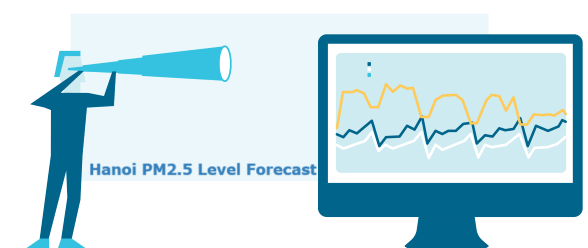

# I. Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px
import inspect
import time
import warnings
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
%matplotlib inline

# II. Import & Handle Data

In [7]:
# Read the CSV file into a DataFrame
df = pd.read_csv('hanoi-aqi-weather-data.csv')  # Replace 'file.csv' with the path to your CSV file

# Convert 'Local Time' column to datetime object
df['Local Time'] = pd.to_datetime(df['Local Time'])

# Set 'Local Time' column as index
df.set_index('Local Time', inplace=True)

# Display the DataFrame
df  # Use df.head() to display the first few rows of the DataFrame

,UTC Time,City,Country Code,Timezone,AQI,CO,NO2,O3,PM10,PM25,SO2,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV Index,Wind Speed
Local Time,,,,,,,,,,,,,,,,,,
2023-03-08 00:00:00,2023-03-07T17:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,131,170.6,29.3,53.3,58.8,47.00,67.3,91,0.0,1016,86,21.2,0.0,2.00
2023-03-08 01:00:00,2023-03-07T18:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,126,158.7,25.0,54.0,56.3,45.00,65.0,100,0.0,1016,89,21.1,0.0,2.00
2023-03-08 02:00:00,2023-03-07T19:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,150.2,21.7,55.0,52.5,42.00,65.7,100,0.0,1016,90,20.9,0.0,1.66
2023-03-08 03:00:00,2023-03-07T20:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,126,141.6,18.3,56.0,56.3,45.00,66.3,100,0.0,1016,91,20.7,0.0,1.33
2023-03-08 04:00:00,2023-03-07T21:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,133.1,15.0,57.0,52.5,42.00,67.0,100,0.0,1015,92,20.5,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-07 20:00:00,2024-03-07T13:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,193,6738.4,36.7,21.4,139.3,87.86,12.0,100,0.0,1014,71,21.5,0.0,1.00
2024-03-07 21:00:00,2024-03-07T14:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,173,6693.2,29.3,19.5,140.6,73.00,6.0,100,0.0,1015,75,21.1,0.0,1.00
2024-03-07 22:00:00,2024-03-07T15:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,241,504.0,108.0,18.4,167.0,124.00,116.0,100,0.0,1016,80,20.6,0.0,1.00


## 2.1. Create a time series of daily PM2.5 level

In [8]:
df_pm25_hourly = df[['PM25']].copy()
df_pm25_daily = df_pm25_hourly.resample('D')['PM25'].agg('mean')
df_pm25 = df_pm25_daily
df_pm25


Local Time
2023-03-08     51.208333
2023-03-09     83.125000
2023-03-10     89.416667
2023-03-11     58.416667
2023-03-12     66.333333
                 ...    
2024-03-04     66.708333
2024-03-05    104.584583
2024-03-06     75.343333
2024-03-07     54.213750
2024-03-08     62.000000
Freq: D, Name: PM25, Length: 367, dtype: float64

## 2.2. Time series information

In [9]:
df_pm25.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 367 entries, 2023-03-08 to 2024-03-08
Freq: D
Series name: PM25
Non-Null Count  Dtype  
--------------  -----  
367 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


The series contains daily data of PM2.5 level from March 3th, 2023 to March 3th, 2024 with 367 values

# III. Explore Data

## 3.1. Check for stationarity in the data (Augmented Dickey-Fuller test)

In [10]:
# Perform ADF test
adf_result = adfuller(df_pm25)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

ADF Statistic: -4.112096613794558
p-value: 0.0009248820462654399
Critical Values: {'1%': -3.448544133483233, '5%': -2.8695574079525565, '10%': -2.5710411593052713}


According to the Augmented Dickey-Fuller test, the ADF Statistic is below all critical values while the p-value is less than the singnificance level of 1%. Therefore we can reject the null can reject the null hypothesis and conclude that the series is stationary

## 3.2. Plot daily data of PM2.5 level

<Axes: title={'center': 'Hanoi PM2.5 Levels, Daily Data'}, xlabel='Date', ylabel='PM2.5 Level'>

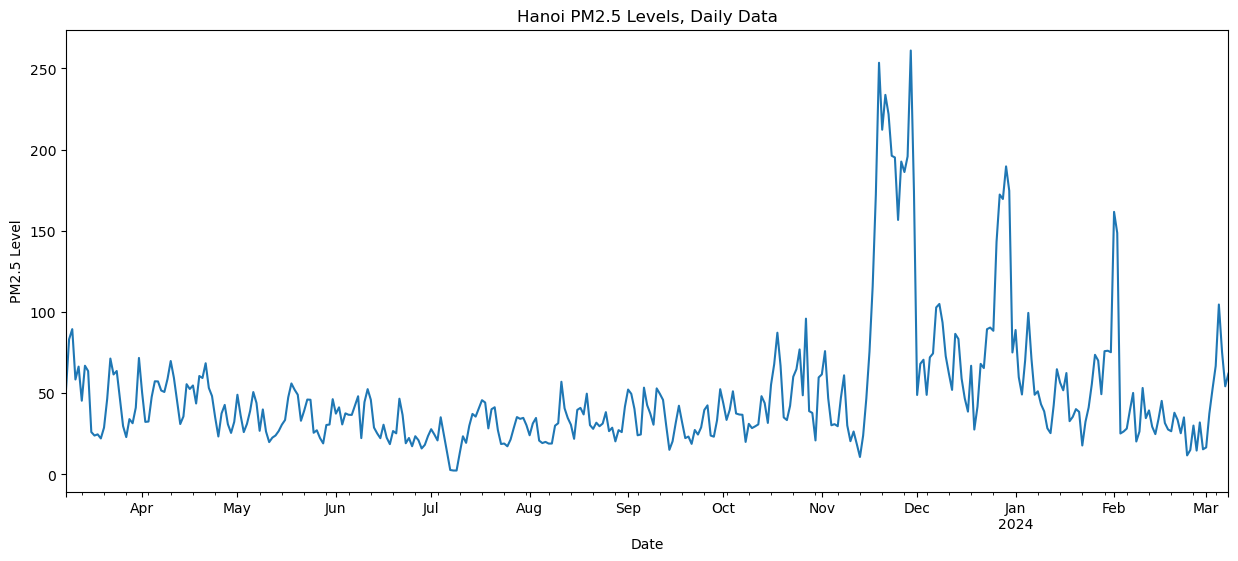

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))
df_pm25.plot(xlabel = "Date",ylabel= "PM2.5 Level",
                           title= "Hanoi PM2.5 Levels, Daily Data", ax=ax)

The daily data appears to show less fluctuation compared to the hourly data observed in the previous notebook. This could be attributed to the aggregation of data on a daily basis, which tends to smooth out the variations in the time series.

## 3.3. Plot ACF and PACF

Text(0.5, 1.0, 'Hanoi PM2.5 Readings, ACF')

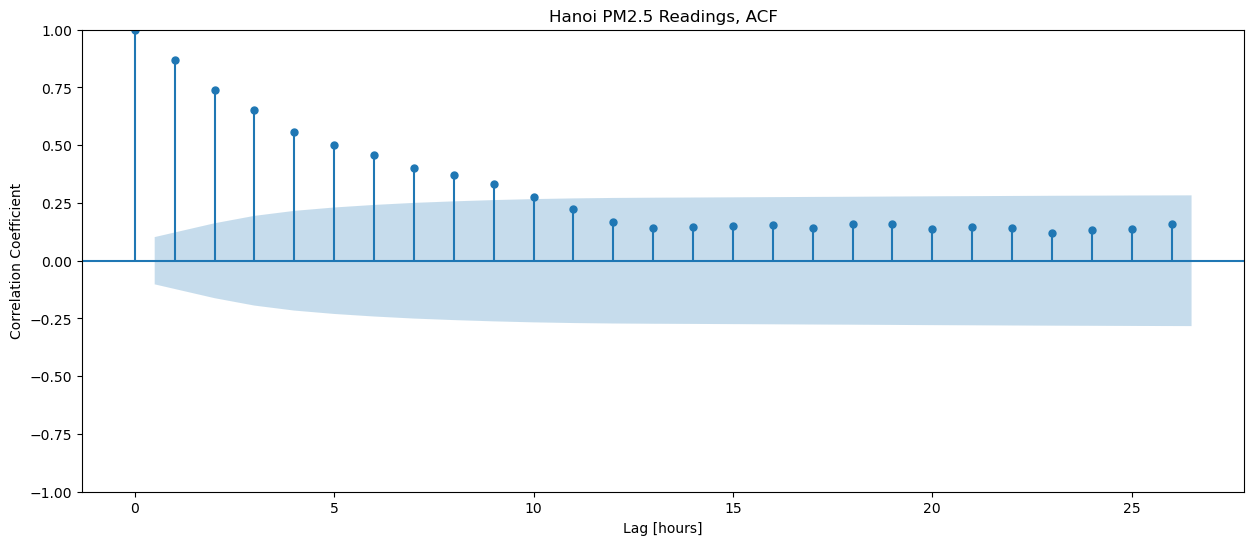

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(df_pm25, ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")
plt.title("Hanoi PM2.5 Readings, ACF")


*The ACF plot displays the correlation coefficients of the PM2.5 time series with its own lagged values, showing significant autocorrelation at multiple lags, especially the lower ones. The first few lags exhibit high positive autocorrelation, indicating a strong correlation with immediate past values. The gradual decay of autocorrelation coefficients as the lag increases suggests a long memory effect, where current values are influenced by values from several days prior. The blue shaded area represents the 95% confidence interval, and many early lags fall outside this interval, confirming significant autocorrelation. The lack of clear periodic spikes suggests an absence of strong seasonality within this time frame.*

Text(0.5, 1.0, 'Hanoi PM2.5 Readings, PACF')

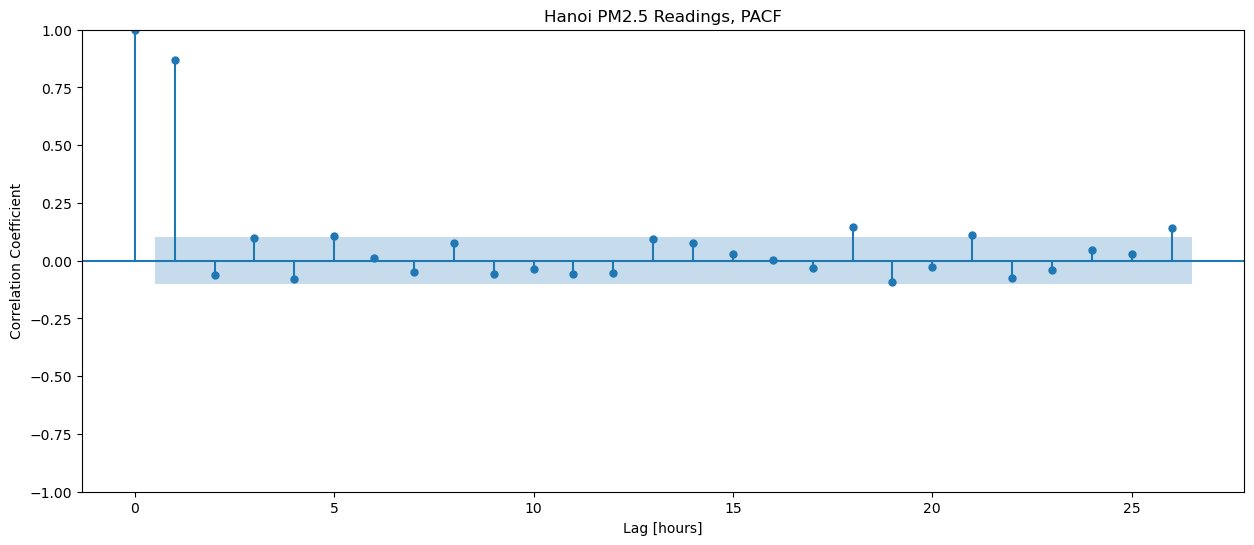

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(df_pm25, ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")
plt.title("Hanoi PM2.5 Readings, PACF")

*The PACF plot shows the correlation coefficients of the PM2.5 time series with its own lagged values, with the linear dependence of intermediate lags removed. The plot exhibits a sharp drop after the first lag, with significant spikes at lags 1 and 2, suggesting that the readings depend on their values from one and two days prior. Beyond lag 2, autocorrelations fall within the confidence interval, suggesting that dependencies are not significant after accounting for the first two lags. This behavior indicates a potential AR(2) process, where the current value is influenced mainly by the previous two values. However, the exact order can be fine-tuned based on further model diagnostics.*

# IV. Split Data

## 4.1. Split data into training set and test set

In [14]:
int(len(df_pm25)) *0.8

293.6

In [15]:
cutoff_test = int(len(df_pm25)* 0.8) 
df_pm25_train = df_pm25.iloc[:cutoff_test]
df_pm25_test = df_pm25.iloc[cutoff_test:]
print("df_pm25_train shape:", df_pm25_train.shape)
print("df_pm25_test shape:", df_pm25_test.shape)

df_pm25_train shape: (293,)
df_pm25_test shape: (74,)


The data will be splitted into 80% of training data and 20% of test data

## 4.2. Check stationarity on the training data set

In [16]:
# Perform ADF test
adf_result = adfuller(df_pm25_train)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

ADF Statistic: -2.6121908805743925
p-value: 0.09050374592428395
Critical Values: {'1%': -3.4540076534999957, '5%': -2.8719557347997178, '10%': -2.5723200648758366}


It can be seen that the p value is above the significance level of 5%, which indicates that the null hypothesis cannot be rejected. In another words, the training data is not stationary.

ARIMA models are generally more effective when applied to stationary time series data. Therefore, differencing technique will be used in the ARIMA model.

# V. Build Model

## 5.1. Baseline

In [27]:
df_pm25_train_mean = df_pm25_train.mean()
df_pm25_pred_baseline = [df_pm25_train_mean]*len(df_pm25_train)
mae_baseline = mean_absolute_error(df_pm25_train, df_pm25_pred_baseline)

print("Mean P2 Reading:", round(df_pm25_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: 47.64
Baseline MAE: 23.13


I use Mean absolute error (MAE) to evaluate the performance of the ARIMA models. It's defined as the average of the absolute difference between actual and predicted values.

Hence, I will calculate the MAE baseline which is the mean model. It predicts the mean of the training data for all future time steps. If the trained models' MAE are below the baseline, the model is performing better than the baseline, indicating that it captures patterns and trends in the data that the baseline does not.

## 5.2. Iterate

In this part, I will iterate the ARIMA(p, d, q) model with different numbers of parameters. 
- p: The number of lag observations (AutoRegressive order).

- d: The number of times the series needs to be differenced to achieve stationarity.

- q: The number of lagged forecast errors (Moving Average order).

As the trained data set is not stationary, the parameter d will be set at 1 as default for every iteration.

### 5.2.1. Set parameter list

In [18]:
p_params = range(0, 8, 1)
q_params = range(0, 3, 1)
list(p_params)

[0, 1, 2, 3, 4, 5, 6, 7]

### 5.2.2. Iterate ARIMA model for each value in parameter list and calculate MAE for each model

In [19]:
# Create dictionary to store MAEs
mae_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = list()
    # Inner loop: Iterate through possible values for `q`
    for q in q_params:
        # Combination of hyperparameters for model
        order = (p, 1, q)
        # Note start time
        start_time = time.time()
        # Train model
        model = ARIMA(df_pm25_train, order=order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        df_pm25_pred = model.predict()
        # Calculate training MAE
        mae = mean_absolute_error(df_pm25_train, df_pm25_pred)
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)

print()
print(mae_grid)


Trained ARIMA (0, 1, 0) in 0.08 seconds.
Trained ARIMA (0, 1, 1) in 0.04 seconds.
Trained ARIMA (0, 1, 2) in 0.07 seconds.
Trained ARIMA (1, 1, 0) in 0.03 seconds.
Trained ARIMA (1, 1, 1) in 0.11 seconds.
Trained ARIMA (1, 1, 2) in 0.13 seconds.
Trained ARIMA (2, 1, 0) in 0.06 seconds.
Trained ARIMA (2, 1, 1) in 0.11 seconds.


C:\Users\nguye\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Trained ARIMA (2, 1, 2) in 0.22 seconds.
Trained ARIMA (3, 1, 0) in 0.05 seconds.
Trained ARIMA (3, 1, 1) in 0.24 seconds.
Trained ARIMA (3, 1, 2) in 0.34 seconds.
Trained ARIMA (4, 1, 0) in 0.09 seconds.
Trained ARIMA (4, 1, 1) in 0.41 seconds.
Trained ARIMA (4, 1, 2) in 0.38 seconds.
Trained ARIMA (5, 1, 0) in 0.09 seconds.
Trained ARIMA (5, 1, 1) in 0.32 seconds.
Trained ARIMA (5, 1, 2) in 0.56 seconds.
Trained ARIMA (6, 1, 0) in 0.22 seconds.
Trained ARIMA (6, 1, 1) in 0.23 seconds.
Trained ARIMA (6, 1, 2) in 0.63 seconds.
Trained ARIMA (7, 1, 0) in 0.13 seconds.
Trained ARIMA (7, 1, 1) in 0.26 seconds.
Trained ARIMA (7, 1, 2) in 0.63 seconds.

{0: [12.103836746302614, 12.099917051447228, 12.019601593567874], 1: [12.100772229804852, 11.716650618534452, 11.724709844167482], 2: [12.056589327616148, 11.725425228637159, 11.698888777580704], 3: [12.022314724057019, 11.714131031319994, 11.699040395975452], 4: [11.884050134616398, 11.716236568710634, 11.691362930320196], 5: [11.8349224408

### 5.2.3. Create grid for models' MAEs to find the best model

In [20]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

,0,1,2,3,4,5,6,7
0,12.1038,12.1008,12.0566,12.0223,11.8841,11.8349,11.8152,11.7666
1,12.0999,11.7167,11.7254,11.7141,11.7162,11.6378,11.7871,11.7893
2,12.0196,11.7247,11.6989,11.6990,11.6914,11.6501,11.6550,11.7581


According to the grid, the ARIMA(5,1,1) model has the lowest MAE. Therefore, we will choose this model for further analysis.

### 5.2.4. Create residual diagnostics

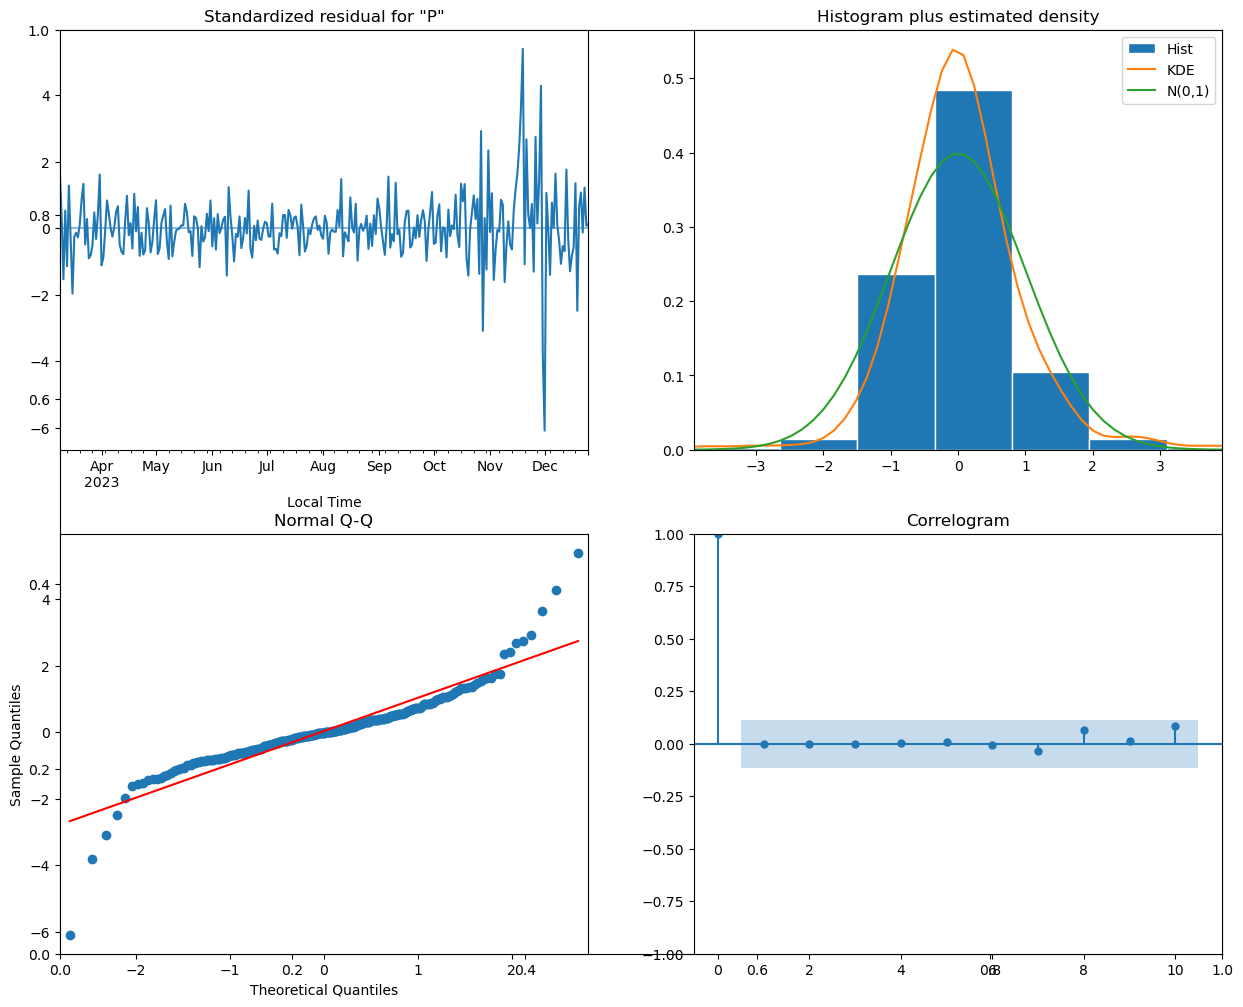

In [21]:
model = ARIMA(df_pm25_train, order=(5,1,1))
results = model.fit()
fig, ax = plt.subplots(figsize=(15, 12))
results.plot_diagnostics(fig=fig)
# Save the plot as an image file (e.g., PNG)
plt.savefig('example_plot.png')

Residual diagnostics in time series analysis are essential for evaluating the adequacy and performance of a fitted model. These diagnostics help identify any patterns or structures left in the residuals that the model has not captured, indicating whether the model assumptions are satisfied. 

**1. Standardized Residuals Plot**
- The residuals appear to be randomly scattered around zero most of the time. Large spikes in November and December indicates that there were outliers during that time.

**2. Histogram plus Estimated Density**
- The residuals seem to follow a normal distribution (bell curve) centered around zero.

**3. Normal Q-Q Plot (Quantile-Quantile Plot)**
- The points lie approximately along a 45-degree line and there seems to be outliers in the two tails

**4. Correlogram**
- There is no significant autocorrelation and the autocorrelations after 0 lie within the confidence interval which is ideal

According to the residual diagnostics, it can be said that the model is robust.


## 5.3. Evaluate

### 5.3.1. Walk-forward Validation

Walk-forward validation is a common technique used in time series forecasting, including ARIMA models. The process involves iteratively fitting the model to historical data up to a certain point, making predictions for the next time step, and then updating the model with the actual observation for that time step.

In [22]:
df_pm25_pred_wfv = pd.Series()  # Initialize as an empty Series instead of a list
history = df_pm25_train.copy()
for i in range(len(df_pm25_test)):
    model = ARIMA(history, order = (5, 1, 1)).fit()
    next_pred = model.forecast()
    df_pm25_pred_wfv = pd.concat([df_pm25_pred_wfv, pd.Series(next_pred)])
    # Round the entire Series to 2 decimals
    df_pm25_pred_wfv = df_pm25_pred_wfv.round(2)
    history = pd.concat([history, df_pm25_test[next_pred.index]])


In [24]:
df_pm25_pred_wfv

2023-12-26     87.47
2023-12-27    138.09
2023-12-28    162.17
2023-12-29    160.73
2023-12-30    179.05
               ...  
2024-03-04     53.29
2024-03-05     66.08
2024-03-06     97.23
2024-03-07     66.75
2024-03-08     56.57
Freq: D, Length: 74, dtype: float64

### 5.3.2. Walk-forward Validation MAE

In [25]:
test_mae = mean_absolute_error(df_pm25_test, df_pm25_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 16.95


The test Mean Absolute Error (MAE) is 16.95, which is lower than the Baseline MAE of 23.13. This indicates that the model performs well and can be considered both acceptable and robust.

# VI. Communicate Results

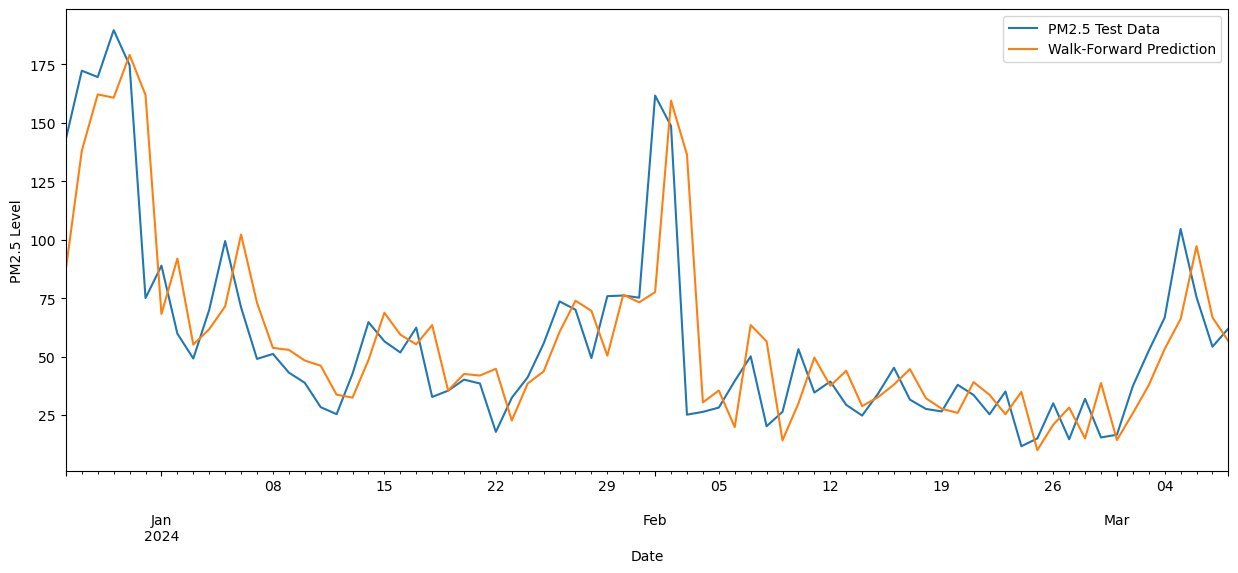

In [26]:
ax = df_pm25_test.plot(label = 'PM2.5 Test Data', figsize=(15, 6))
df_pm25_pred_wfv.plot(ax=ax, label='Walk-Forward Prediction')
plt.ylabel('PM2.5 Level')
plt.xlabel('Date')
plt.legend()
plt.show()

The plot above shows the comparison between the PM2.5 test data and the Walk-Forward Prediction. The blue line represents the actual PM2.5 levels observed in the test dataset, while the orange line represents the predictions made by the ARIMA model using walk-forward validation.

From the graph, it is evident that the model's predictions closely follow the actual test data trends, capturing the significant peaks and troughs. This indicates that the model performs well in forecasting the PM2.5 levels, providing a robust and reliable prediction. The close alignment of the two lines suggests that the model is effective in capturing the underlying patterns and seasonality present in the time series data.